<h1 align="center">GraphQuest: Unveiling Player Engagement in Multiplayer Games</h1>
<h3 align="right">Suryakumar Selvakumar - 110975883</h3>

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset
df = pd.read_csv("data/online_gaming_behavior_dataset.csv")

# Display some rows to ensure data has loaded
df.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


In [3]:
# Display some basic features
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usag

## Dataset Overview

**Dimensions:** *40,034* rows and *13* columns
- The dataset is moderately large with enough data for Data Analysis and Machine Learning

**Features:**
- **Numerical features:**
  - *PlayerID*, *Age*, *PlayTimeHours*, *InGamePurchases*, *SessionsPerWeek*, *AvgSessionDurationMinutes*, *PlayerLevel*, and *AchievementsUnlocked*.
  - These are the features that can be used for statistical analysis and may need to be standardized for ML model training & evaluation
- **Categorical features:**
  - *Gender*, *Location*, *GameGenre*, *GameDifficulty*, and *EngagementLevel*.
  - These are features that can be used to analyze the dataset as sets of groups and may need to be encoded for ML model training & evaluation
- **Target feature:**
  - *EngagementLevel*
  - It provides how engaged the player is with the game they are playing
  - This feature contains three types of values - *high*, *medium*, and *low*
  - This feature introduces a multi-class classification problem which our ML model will be trained to solve

**Missing values:**
- The dataset does not contain any null values, so data cleaning is not necessary. We can proceed with further analysis.

In [4]:
# Display stats of dataset
df.describe()

,PlayerID,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked
count,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000
mean,29016.500000,31.992531,12.024365,0.200854,9.471774,94.792252,49.655568,24.526477
std,11556.964675,10.043227,6.914638,0.400644,5.763667,49.011375,28.588379,14.430726
min,9000.000000,15.000000,0.000115,0.000000,0.000000,10.000000,1.000000,0.000000
25%,19008.250000,23.000000,6.067501,0.000000,4.000000,52.000000,25.000000,12.000000
50%,29016.500000,32.000000,12.008002,0.000000,9.000000,95.000000,49.000000,25.000000
75%,39024.750000,41.000000,17.963831,0.000000,14.000000,137.000000,74.000000,37.000000
max,49033.000000,49.000000,23.999592,1.000000,19.000000,179.000000,99.000000,49.000000


## Statistical Analysis

#### Age:
- The average age of a gamer in the dataset is *32* years, while the minimum age is *15* years and the maximum age is *41* years, suggesting people across a huge age range play online video games.
- The interquartile range (*25%* - *23* years to *75%* - *41* years) suggests the majority of the players fall into the young adulthood (Age 20 - 39) age category.

#### InGamePurchases:
- The average number of gamers who make in-game purchases is *20%*
- This suggests only a fifth of the gamers in the dataset spend money on in-game items
- Increasing this proportion could be a worthwhile goal for gaming companies

#### SessionsPerWeek:
- The average number of gaming sessions the players engage in is around 9 per week
- A minimum of 0 suggests some gamers may not play any games at all in a week and a maximum of 19 suggests some gamers play games for less time but in more frequent intervals
- The interquartile range (*25%* - *4* sessions to *75%* - *14* sessions) gives the range of sessions that the majority of players engage in on a weekly basis

#### AvgSessionDurationMinutes:
- The average gaming session across all players lasts *~95* minutes, the minimum time players spend gaming is *10* minutes, and the maximum time they spend is *179* minutes
-  The interquartile range (*25%* - *52* minutes to *75%* - *137* minutes) suggests that most players play videogames for more or less, *1-2* hrs per session

#### PlayerLevel:
- The average level of a player is level *50*, while the min and max levels of players is *1* and *99* respectively, meaning the dataset contains a fair and equal representation of players across all levels
- The interquartile range (*25%* - level *25* to *75%* - level *74*) also supports the previous finding of a fair representation and shows that most players are in the middle range of the standard deviation in terms of their levels in the games they play.

#### AchievementsUnlocked:
- The average player has unlocked *25* achievements in the game they play, while some players have unlocked no achievements and some dedicated players have unlocked *49* achievements.
- The interquartile range (*25%* - *12* achievements to *75%* - *37* achievements) follows a similar pattern to that of *PlayerLevel* where most players fall into the middle range of the achievements when taking min and max values into consideration, suggesting the existence of a positive correlation between *PlayerLevel* and *AchievementsUnlocked*

In [5]:
# Check for null/duplicate values

print("Null values in each column:\n")
print(df.isnull().sum())
print("\n")
print("Duplicate values in the dataset:", df.duplicated().sum())

Null values in each column:

PlayerID                     0
Age                          0
Gender                       0
Location                     0
GameGenre                    0
PlayTimeHours                0
InGamePurchases              0
GameDifficulty               0
SessionsPerWeek              0
AvgSessionDurationMinutes    0
PlayerLevel                  0
AchievementsUnlocked         0
EngagementLevel              0
dtype: int64


Duplicate values in the dataset: 0


In [6]:
# Display count of unique values in each column 
print("Unique values in each column:\n")
df.nunique()

Unique values in each column:



PlayerID                     40034
Age                             35
Gender                           2
Location                         4
GameGenre                        5
PlayTimeHours                40034
InGamePurchases                  2
GameDifficulty                   3
SessionsPerWeek                 20
AvgSessionDurationMinutes      170
PlayerLevel                     99
AchievementsUnlocked            50
EngagementLevel                  3
dtype: int64

## Unique Values Analysis

**PlayerID:**
- *40,034* - Exactly matches the no. of rows in the dataset, meaning each player has a unique ID
  
**Age:**
- *35* - The ages of the gamers vary widely across *35* possible ages

**Gender:**
- *2* - The players in the dataset are one of two genders *(Male or Female)*

**Location:**
- *4* - The players originate from four regions *(USA, Asia, Europe, Other)*

**GameGenre:**
- *5* - The online games played by the players are divided into five categories *(Sports, Action, Strategy, RPG, Simulation)*

**InGamePurchases:**
- *2* - The players have either made an in-game purchase *(1)* or they have not *(2)*

**GameDifficulty:**
- *3* - The difficulty of the multiplayer games played by the players can be one of three modes *(Easy, Medium, Hard)*

**SessionsPerWeek:**
- *20* - The players engage in *0* (no) sessions per week or upto *19* sessions per week

**AvgSessionDurationMinutes:**
- *170* - The players on average play for *0* to *170* minutes per session

**PlayerLevel:**
- *99* - The players' levels range between *1* and *99*

**AchievementsUnlocked:**
- *50* - The players unlocked anywhere between 0 and 50 achievements in their respective games

**EngagementLevel:**
- *3* - Engagement of the players with their games can vary between three levels *(Low, Medium, High)*

In [7]:
# we see that the InGamePurchases is actually categorical (has only 2 unique values - 1 and 0) despite having numerical values
# so lets fix that
df["InGamePurchases"] = df["InGamePurchases"].astype("category")

In [8]:
# Data distribution

print("Categorical columns:\n")
display(df.select_dtypes(include=["object", "category"]).columns.tolist())

print("\nNumerical columns:\n")
display(df.select_dtypes(include=["float64", "int64"]).columns.tolist())

Categorical columns:



['Gender',
 'Location',
 'GameGenre',
 'InGamePurchases',
 'GameDifficulty',
 'EngagementLevel']


Numerical columns:



['PlayerID',
 'Age',
 'PlayTimeHours',
 'SessionsPerWeek',
 'AvgSessionDurationMinutes',
 'PlayerLevel',
 'AchievementsUnlocked']

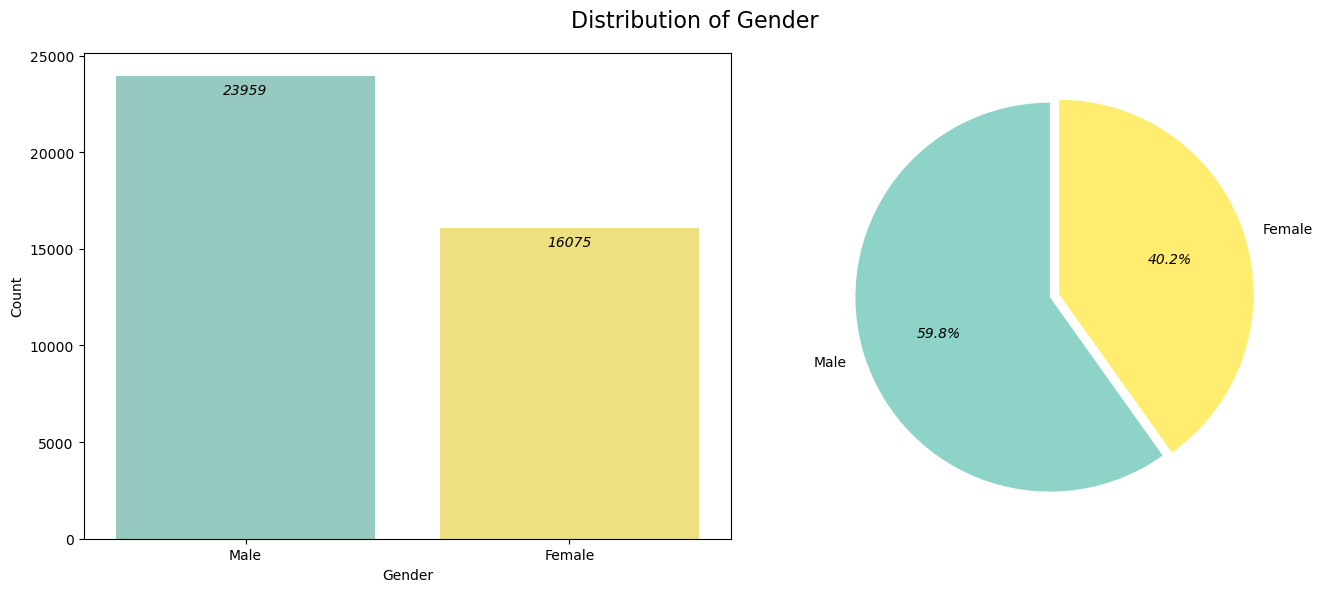

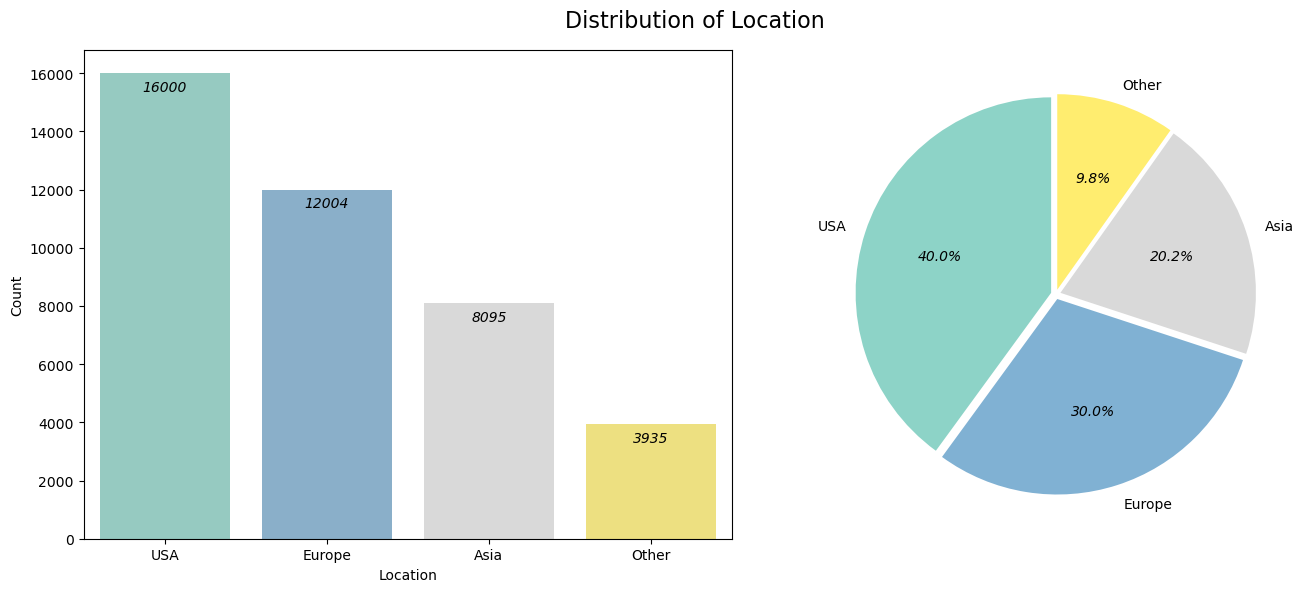

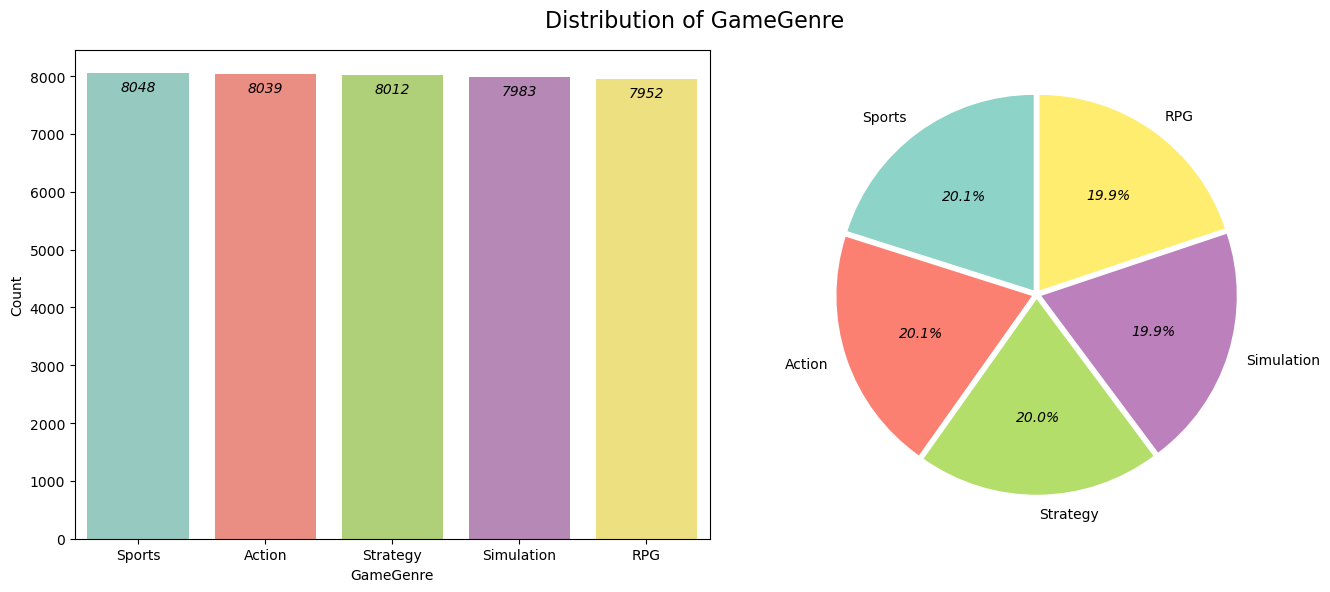

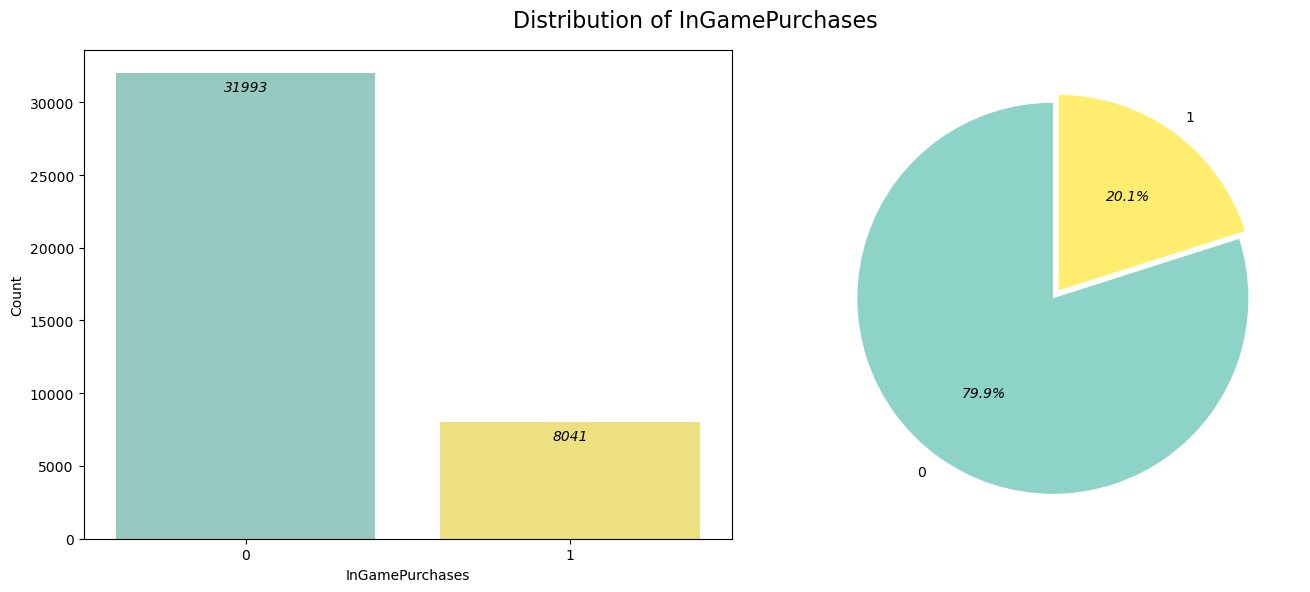

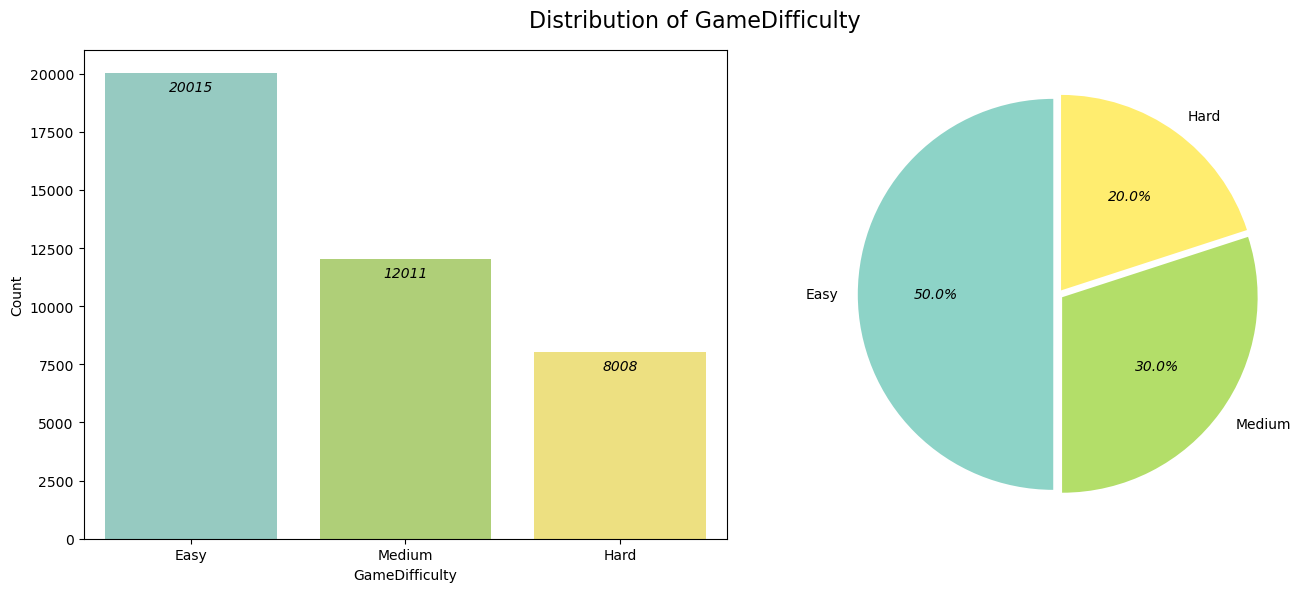

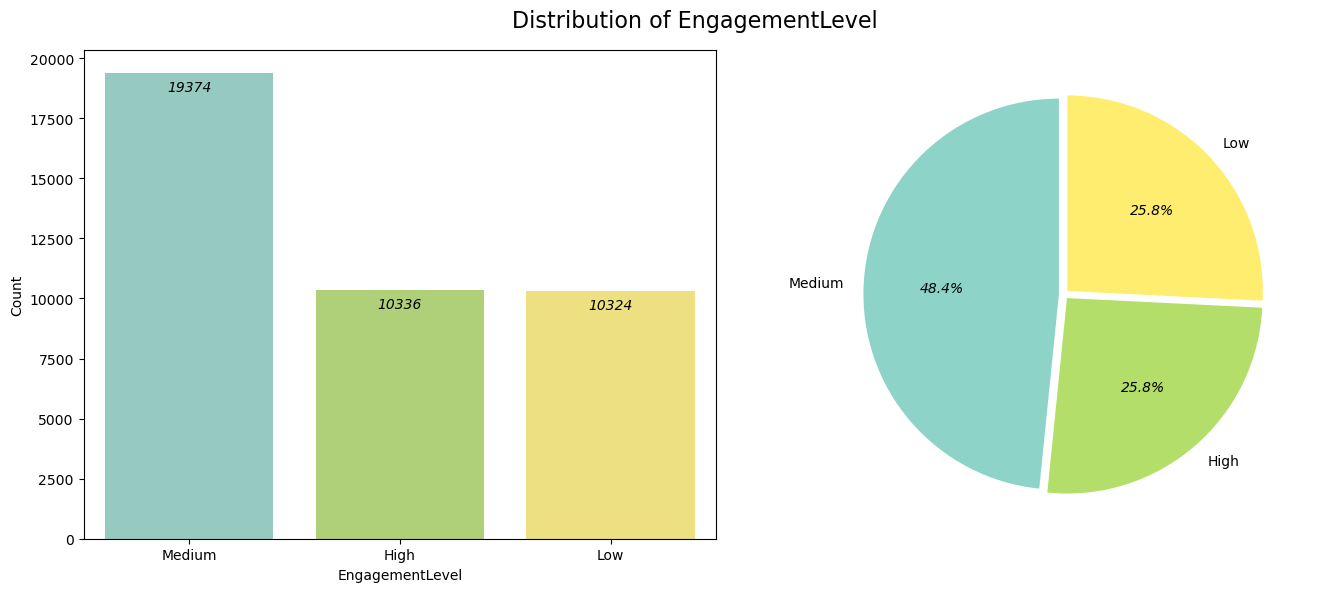

In [9]:
# Plot unique values of Categorical Column

def visualize_unique_categories(categorical_column_name, data):

    # Fetch unique combinations of column and set colors
    value_counts = data[categorical_column_name].value_counts()
    colors = plt.cm.Set3(np.linspace(0, 1, len(value_counts)))

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    fig.suptitle(f"Distribution of {categorical_column_name}", fontsize=16)

    # Bar chart
    sns.barplot(x=value_counts.index, y=value_counts.values, palette=colors, ax=axes[0])
    for p in axes[0].containers:
        axes[0].bar_label(p, fmt="%d", fontsize=10, label_type="edge", padding=-15, fontstyle="italic")
    axes[0].set_xlabel(categorical_column_name)
    axes[0].set_ylabel("Count")

    # Pie chart
    wedges, texts, autotexts = axes[1].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', colors=colors, explode=[0.025]*data[categorical_column_name].nunique(), startangle=90)
    for text in autotexts:
        text.set_fontstyle("italic")
    plt.tight_layout()
    plt.show()

categorical_columns = ["Gender", "Location", "GameGenre", "InGamePurchases", "GameDifficulty", "EngagementLevel"]

for category in categorical_columns:
    visualize_unique_categories(category, df)

## Analysis of Categorical Features

#### Gender
- **Observation:** Around *60%* of the players in the dataset are Male while around *40%* are Female. Research on gaming suggests that women tend to gravitate towards role-playing games (RPGs) and Simulation games with more story-driven narratives and character development, while men often prefer competitive action, sports, and strategy games. The dataset contains an equal proportion of these game genres (*~20%* each) divided across the players. When accounted for, this could explain the disparity between the male and female player count.
- **Suggestion:** If gaming companies wish to increase the count of male or female gamers that play their games, they should pay attention to and keep up with the latest research on male vs female neurological differences and release games that cater to male and female nature. Adding masculine themes/content to games played predominantly by women and feminine themes/content to games played predominantly by men in an attempt to increase the player base or engagement of the opposite gender could alienate the predominant gender instead.
  
#### Location
- **Observation:** USA accounts for the most number of gamers in the dataset, which makes sense as its a developed first-world country with more access to technology and subsequently gaming tech and video games. It is followed by Europe, then Asia and other countries compiled into a single category, possibly in a decreasing order in terms of their development as a nation. This is partly due to people in developed countries not having to worry about survival needs and other basic needs, therefore being able to spend leisure time on activities such as Gaming. 
- **Suggestion:** If gaming companies wish to maximize their profits i.e., increase their player base in less developed nations, they may do so in one of two ways:
  - Companies could enhance their games and tailor it for the local audiences of these countries, making them more appealing.
  - Companies could focus their marketing strategies on regions in these countries where gamers are most concentrated to increase the chances of their games being sold.

#### GameGenre
- **Observation:** There is almost an even distribution of the game genres in the dataset, suggesting that the dataset contains an equal amount of players who play games from each of the five genres.
- **Suggestion:** If gaming companies wish to make games that appeal to people who enjoy different genres, then the best course of action would be to focus on one genre and introduce minor elements from other genres to invite other genre enthusiasts to explore games in a different genre while also enjoying what they love. A direct mishmash of genres in a game with an intention of appealing to everyone may end up not appealing to anyone at all. Therefore, a logical combination of genre mixing would make for the best games, for example, Action + RPG, Sports + Simulation, Action + Strategy, and so on.
  
#### InGamePurchases
- **Observation:** The data suggests that only around 20% of players make in-game purchases, meaning a vast majority of the players do not spend money in videogames. 
- **Suggestion:** If companies wish to get more players to make in-game purchases, they may do in one of two ways:
  - Create a culture around the game such that spending money is incentivized and not doing so is shamed. This could be done by introducing cosmetic items to the game that correlate with a player's standing in the game's heirarchy, making it so that players without the same cosmetics are seen as lesser than and therefore incentivizing those players to spend money.
  - Introduce a progression system into the game that can be unlocked and sped up with money. Gamers want to know they are progressing in any videogame that they're playing. Locking that progession system behind a paywall and allowing gamers to use money to progress faster may tempt them to spend money so they can progress and do so at a faster rate. Combining this with the previous idea by rewarding cosmetic items for progression could also be beneficial. 

#### GameDifficulty
- **Observation:** Half of the gamers in the dataset prefer to play *easy* games, while *30%* like games with *medium* difficulty, and lastly *20%* like challenging games as indicated by their *hard* difficulty choice. This makes sense as the average gamer is a casual videogame enjoyer who plays videogames to have fun. Another subset may like to have fun but also doesn't mind occasional challenges. A smaller subset may enjoy challenges on a regular basis so they play games on *hard* difficulty. 
- **Suggestion:** In online games, tweaking difficulty is a challenging task as it is not possible to appeal to everyone's difficulty preferences. So, if gaming companies wish to make their online games enjoyable to gamers who enjoy different difficulty levels, then it would be wise to seperate these players into their own game modes. For example, the online game could offer a casual mode that emphasizes having fun for those who prefer easy difficulty, a normal mode where you can still win for those who want to compete but not at the highest level and Competitive/Ranked mode where the game is most challenging as the players would be pitted against others of the same rank.
  
#### EngagementLevel
- **Observation:** Almost half the gamers are displaying an engagement level of medium, while the remaining players are either highly engaged or have a low engagement level. This shows that many of the games are not successful engaging their player base to the fullest.
- **Suggestion:** Some effective ways to increase player's engagement level are as follows:
  - Introduce a progression system that enables players to see that they're making progress i.e., getting better at the game. A properly implemented system can achieve this and increase player engagement
  - Introduce different game modes that allows players with differing skills to win. Online games are competitive in nature and generally gamers like to win, however not everyone can win, only a small subset can, which means the remaining players will be not as engaged as the winners. To get around this, different game modes of differing difficulty levels may be added to the game to allow different subsets of gamers to win, thereby increasing their engagement level.

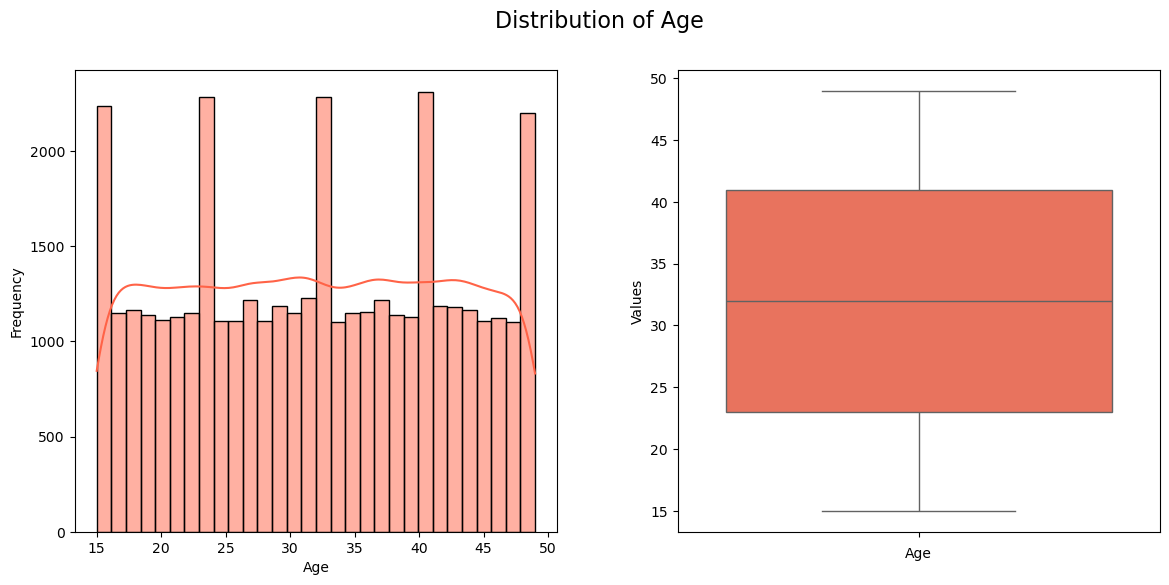

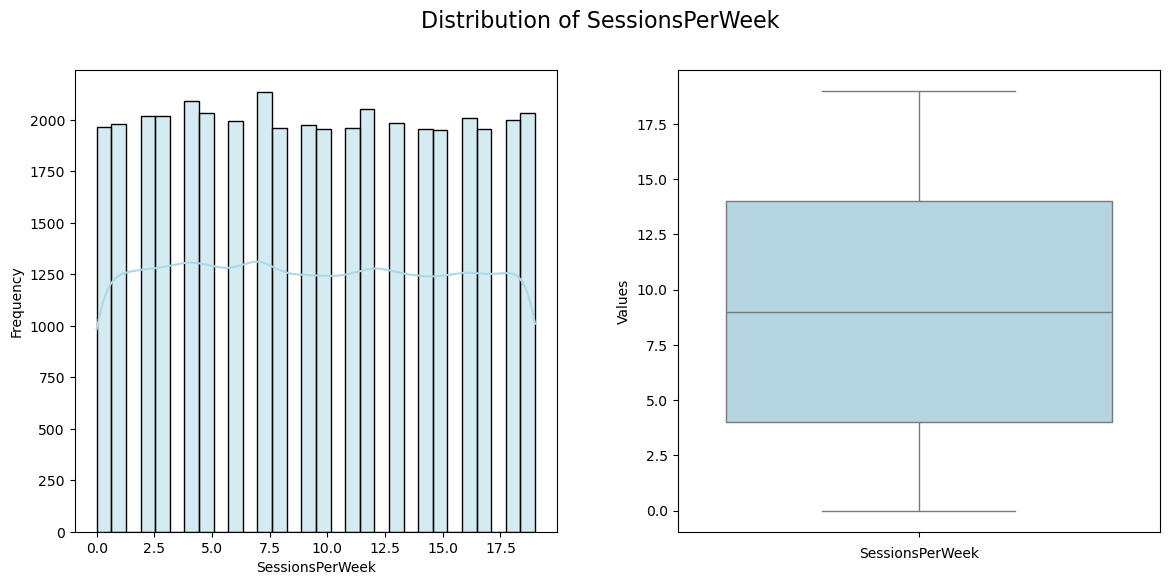

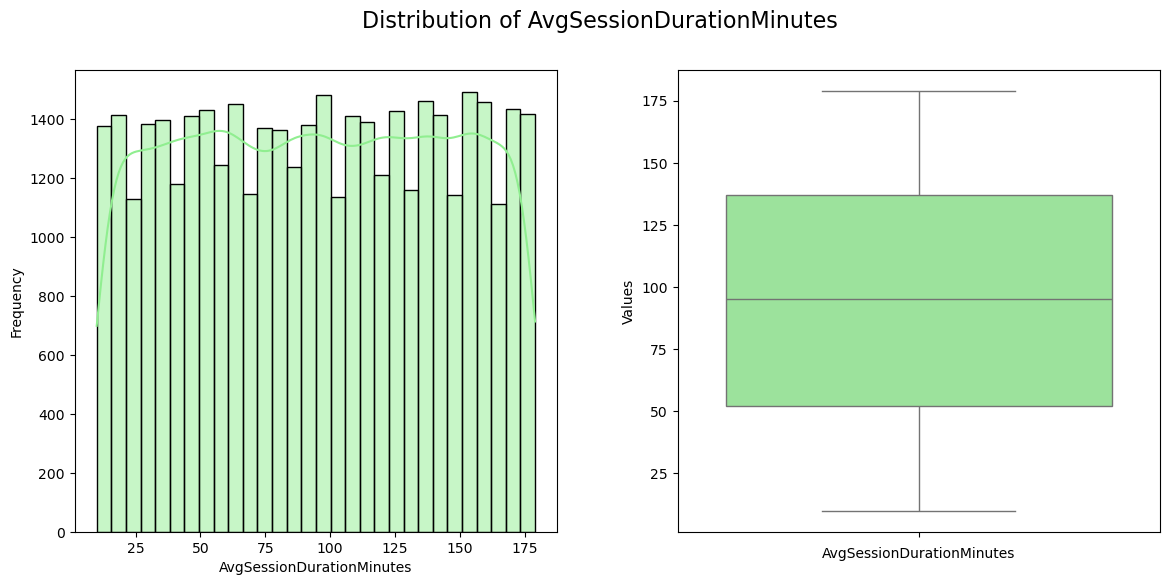

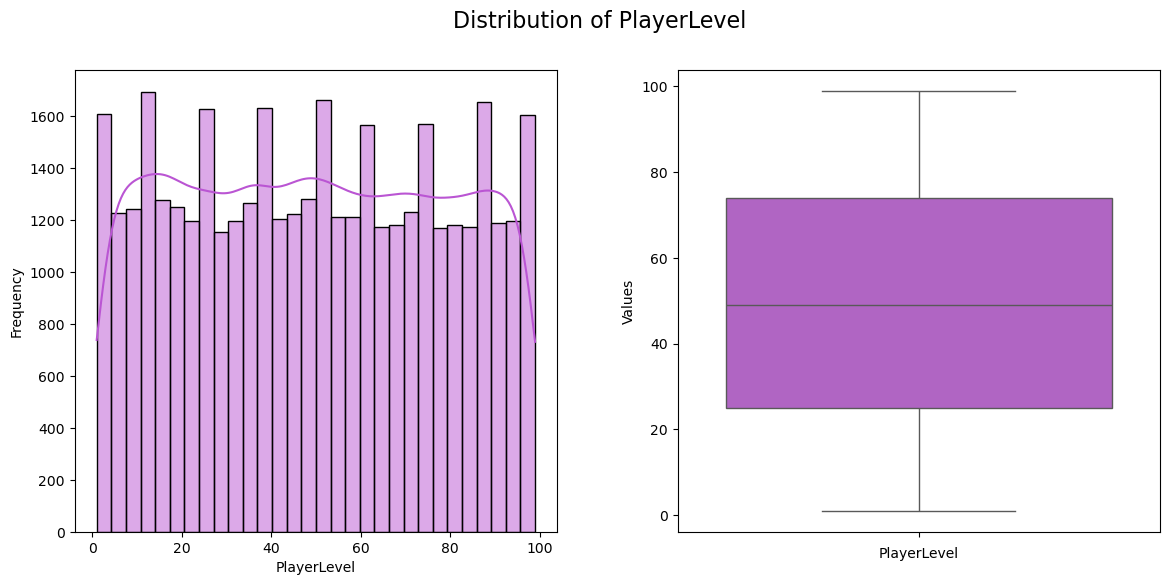

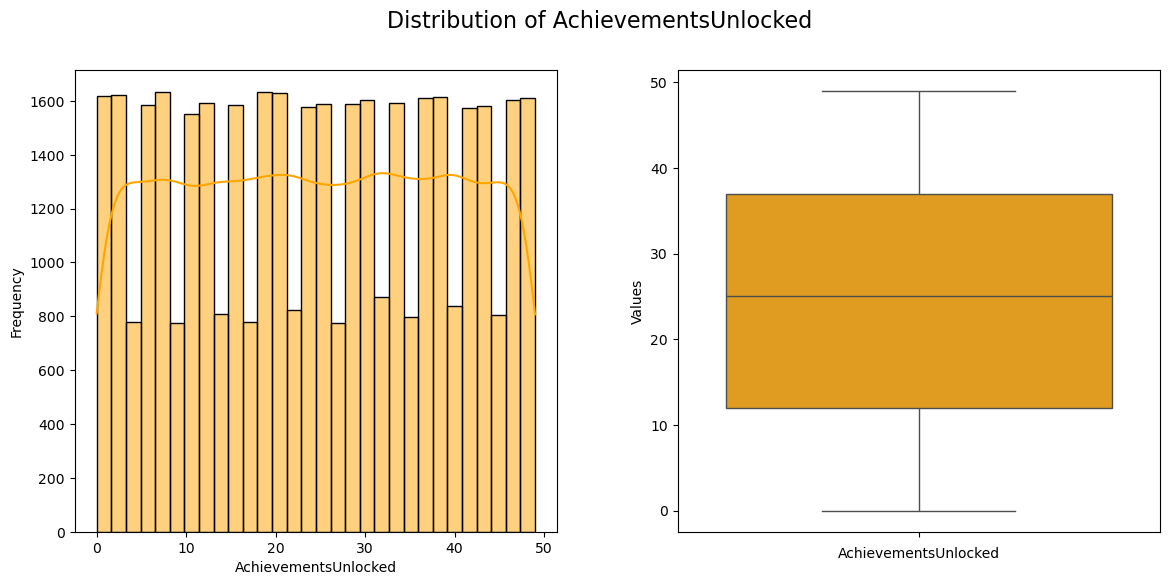

In [10]:
# Plot values of numerical columns

def visualize_numerical_columns(numerical_column_name, data, index):

    fig, axes = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw = {"wspace": 0.25})
    fig.suptitle(f"Distribution of {numerical_column_name}", fontsize=16)

    # histogram for each column to show the distribution of different frequencies
    sns.histplot(data[numerical_column_name], bins = 30, kde = True, ax = axes[0], color=colors[index])
    axes[0].set_ylabel("Frequency")

    # box-plot to detect outliers
    sns.boxplot(data[numerical_column_name], color=colors[index], ax=axes[1])
    axes[1].set_ylabel("Values")
    axes[1].set_xlabel(numerical_column_name)

# Remove PlayerID as its fully unique, Remove PlayTimeHours as its erroneous
numerical_columns = [
 'Age',
 'SessionsPerWeek',
 'AvgSessionDurationMinutes',
 'PlayerLevel',
 'AchievementsUnlocked']

colors = ["tomato", "lightblue", "lightgreen", "mediumorchid", "orange"]

for i, num_col in enumerate(numerical_columns):
    visualize_numerical_columns(num_col, df, i)

plt.tight_layout()
plt.subplots_adjust(hspace=0.25, wspace=0.25)
plt.show()

## Analysis of Numerical Features

#### Age
- **Observation:** From the histogram, it can be observed that most of the age groups occur more or less the same number of times, save for a few distinct age groups such as *~(15-16)*, *~(23-24)*, *~(32-33)*, *~(40-41)*, *~(48-49)*. These age groups seem to be much more prevalent at around *~(2500-2750)* occurences. The box-plot's interquartile range (*25%* - *23*, median - *32.5*, *75%* - *41*) suggests that the majority of gamers are in the young-adulthood age group (age *20-39*). We also see that there are no outliers in the dataset in terms of the age of the players, meaning it is relatively balanced within a fixed range.  
- **Suggestion:** Different age groups may game for different reasons. Teens and young gamers tend to game competitively or for longer durations as their concerns in life are much lower while people around and above a middle age of *30* may game for recreational reasons as they may have real-life responsibilities. Game companies may benefit from a clear vision for the age group that they intend to attract to their games, and how they might appeal to the desires of different age groups. 

#### SessionsPerWeek
- **Observation:** The histogram shows a relatively even distribution of the gaming sessions per week that the players in the dataset engage in with some bumps as indicated by the KDE curve. The median or average number of sessions seem to be around *8.5* sessions per week and most gamers tend to engage in *4* to *14* gaming sessions per week.
- **Suggestion:** If gaming companies wish to increase the number of sessions that their game's players engage in so as to increase the chances of them making in-game purchases, they may consider implementing reward mechanisms that incentivize players to play their games for multiple sessions across the week. For example, daily tasks unique to each day and weekly tasks that span an entire week with special rewards or progression boosts attached to the completion of these tasks may get players to play for longer durations and for more sessions each week. 

#### AvgSessionDurationMinutes
- **Observation:** The curve of the histogram shows is almost normal but with some noticable irregularity, meaning that the average duration that gamers play videogames per session is quite varied. Most gamers on average seem to spend between *50* to *137* minutes gaming per session and average time that is most common is around *~90* minutes per session. 
- **Suggestion:** The average time that gamers spend playing a game is directly correlated with how engaged they are with the game, its mechanics, progression and reward systems. Companies should aim to proactively collect data regarding player opinions and satisfaction levels and improve their games and their systems on an iterative basis to increase and retain player engagement which will result in longer gaming durations from the players. 

#### PlayerLevel
- **Observation:** PlayerLevel also seems to follow a mostly-normal distribution with some levels being more frequently found compared to others. For example, *~(0-3)*, *~(10-12)*, and so on, totalling 9 unique instances. The specific increase in the clustering of these levels in the dataset could indicate that these level ranges are important milestones or progress points in the games' progression systems in that potentially more than normal effort is required to reach these levels, they may provide unique rewards for reaching them, or could take more effort to reach the next set of levels after this one. 
- **Suggestion:** If companies wish to increase the engagement level of their players, then a successful progression system in their games is essential. The leveling system has to strike the perfect balance between easy enough to be doable and hard enough to feel rewarding when new levels are accomplished. Strategically positioning certain levels as milestones with unique rewards and placing the best rewards in the highest levels could encourage players to invest in the progression system, therefore incentivizing them to spend more time levelling up, increasing their engagement and improving the odds of them spending money. 

#### AchievementsUnlocked
- **Observation:** This feature is also normal-like, however with some conspicuous variability in the count of the no. of achievements that players have unlocked. Around *2/3rds* of the achievements unlocked counts are distributed equally around a frequency of *1600* while *1/3rd* of the count is significantly lower at around *800*. For example, *~(4-5)*, *~(7-9)*, *~(13-14)*, etc. totalling *10* unique counts for the achievements unlocked. This alludes to the existence of special achievements that are milestones which have to be unlocked before the next set of achievements are available to be unlocked and the reason they're less frequent could be that players fail to achieve these special achievments, subsequently getting stuck with their achievement count, while the players who manage to unlock these special achievements are then able to unlock new sets of achievements and so on. This pattern could explain why *1/3rd* of the achievements unlocked count occurs only half as many times as the remaining counts in the dataset. 
- **Suggestion:** Another way for companies to increase engagement in their games is by creating achievements that are enjoyable and rewarding to unlock. An effective achievement can be one,
  - that is intrinsically rewarding to achieve as it could indicate the hierarchical standing of the players in the game
  - that could be setup to be interpreted as badges of honor indicating the talent/skills of the players of the game,
Achievements fulfilling these criteria would incentivize players to spend time and compete to achieve them, thereby increasing engagement and increasing odds of players spending money on in-game items.

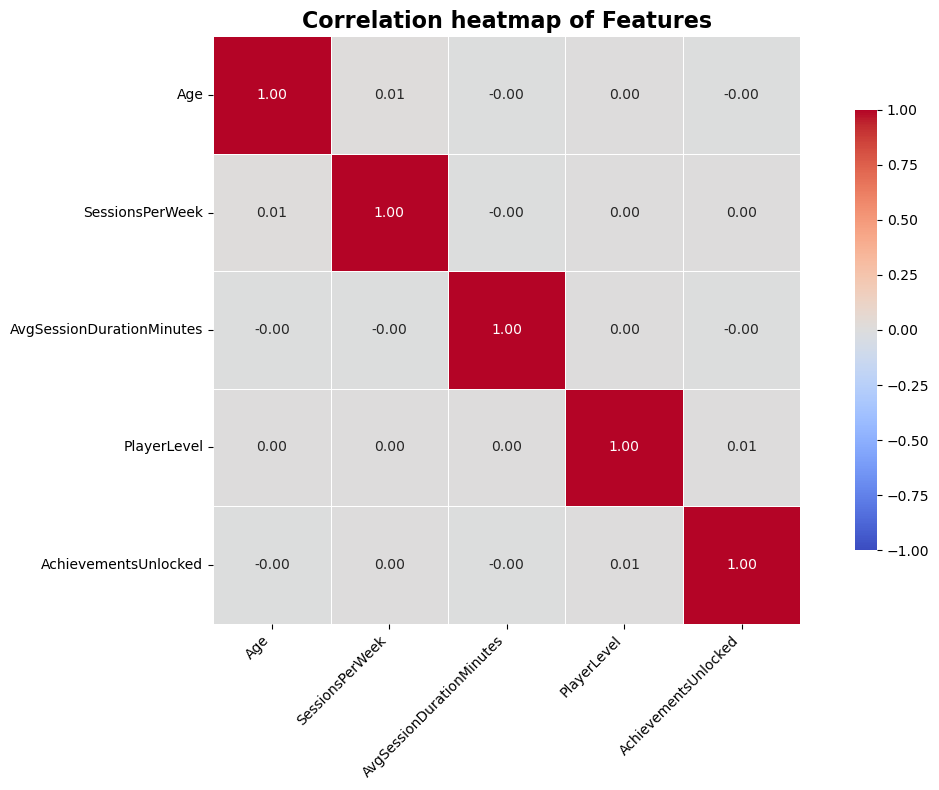

In [11]:
# Feature correlation

plt.figure(figsize=(12, 8))

# Pearson correlation only works with numerical features
# PlayerID is unique to each row and its correlation with other features won't lead to any interesting insights
# So lets drop categorical columns & PlayerID, and create a correlation matrix with the rest of the features
corr_matrix = df.drop(columns = ["PlayerID", "Gender", "Location", "GameGenre", "InGamePurchases", "GameDifficulty", "EngagementLevel", "PlayTimeHours"]).corr()

ax = sns.heatmap(
    corr_matrix,
    vmin=-1, 
    vmax=1,
    center=0,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.75},
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment="right",
    fontsize=10,
)

ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0,
    horizontalalignment="right",
    fontsize=10,
)

plt.title("Correlation heatmap of Features", fontsize=16, fontweight="bold")
plt.tight_layout()
plt.show()

# Correlation Analysis

#### Weak Correlation
There is an extremely weak positive correlation (*0.01*) between some feature pairs. These include Age-SessionsPerWeek and PlayerLevel-AcheivementsUnlocked. However, this correlation is insignificant, and hardly enough to form any meaningful connections between these features. 

#### Zero/No Correlation
The remaining feature pairs all exhibit no correlation (*0.00*), meaning there is no discernable relationship between these features, i.e., they exist independent of each other in the dataset. 

#### Conclusion
These results suggest that the numerical features in the dataset,
- are almost entirely independent of each other
- are individually important to our data analysis task
- can contribute individually to our ML model's training.

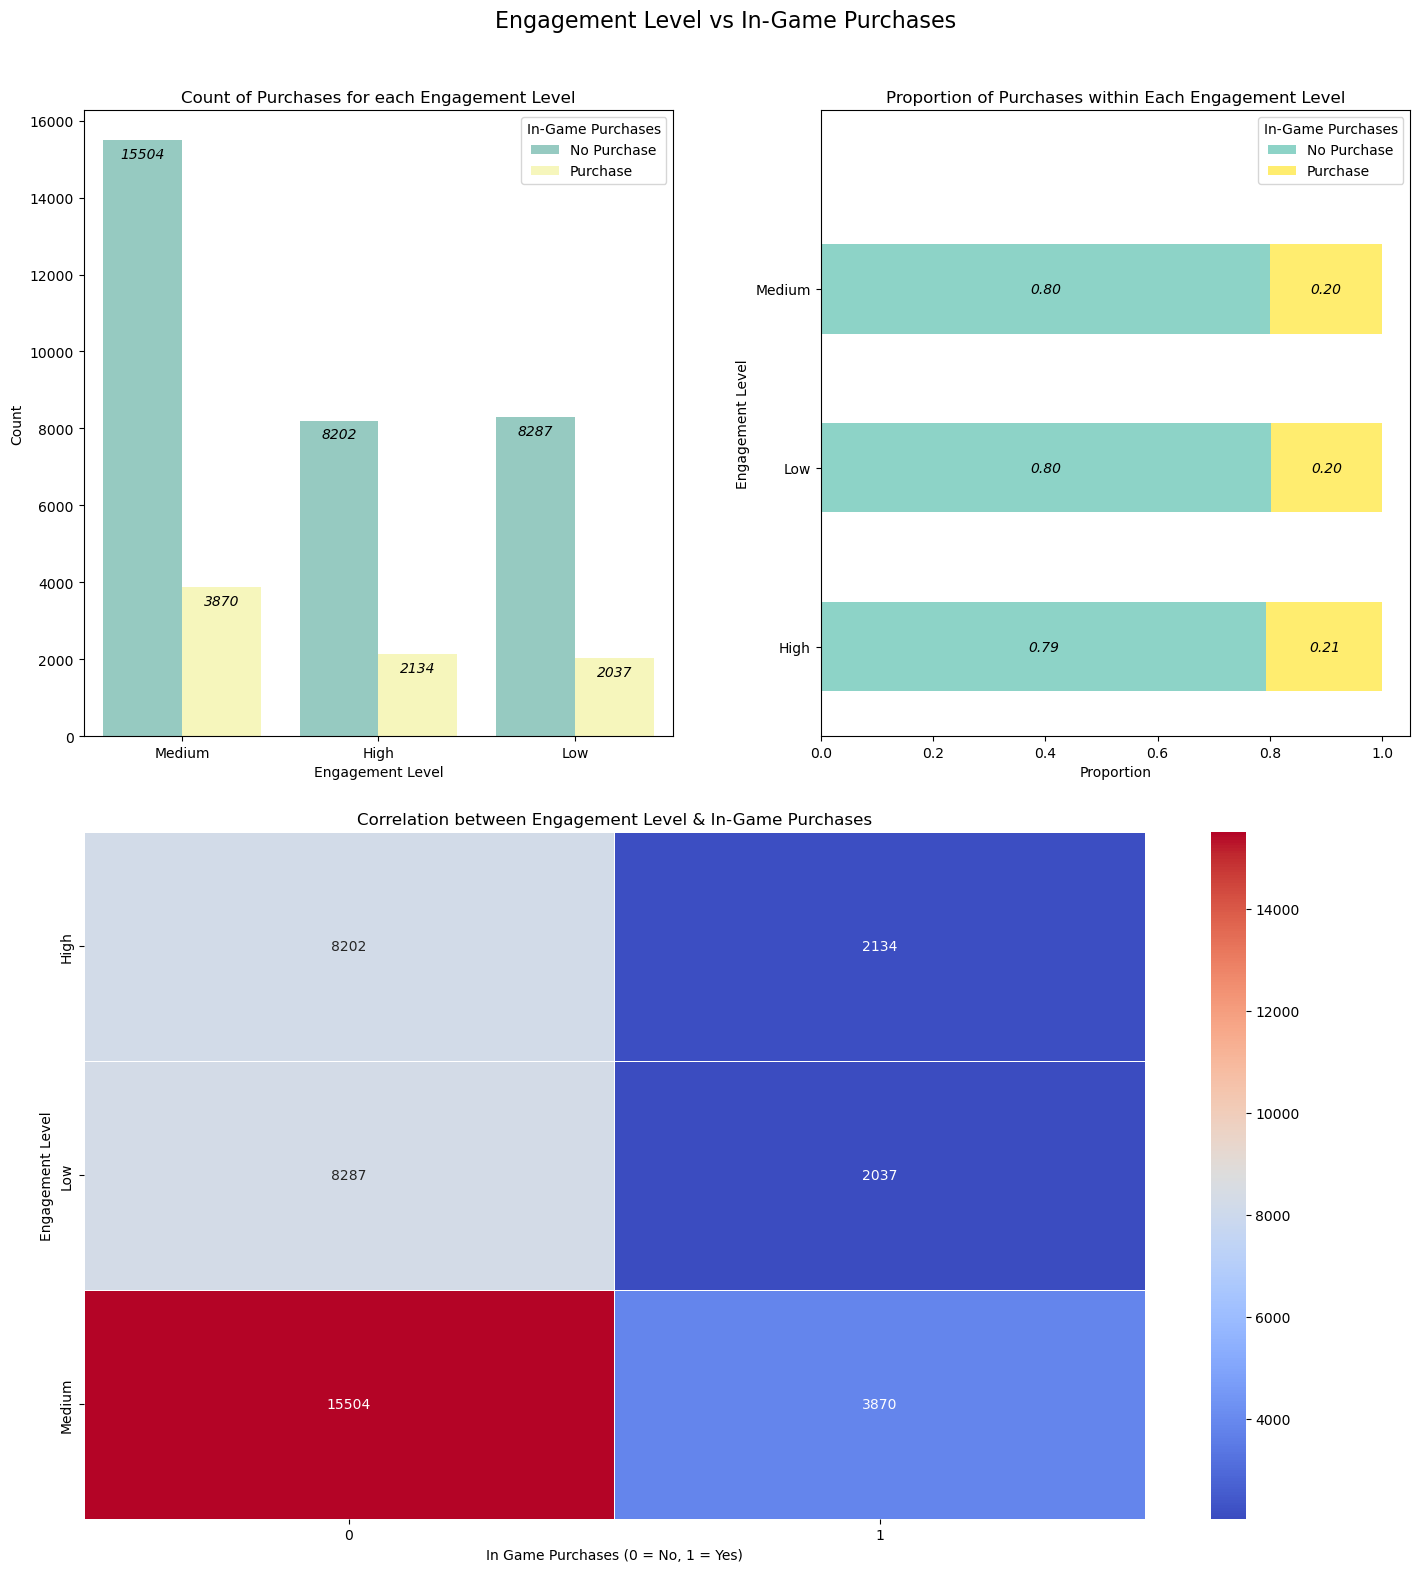

In [12]:
# Relationship between InGamePurchases and Engagement

# Numerical comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 16), gridspec_kw = {"wspace": 0.25, "hspace": 0.25})
fig.suptitle("Engagement Level vs In-Game Purchases", fontsize=16)

sns.countplot(data=df, x="EngagementLevel", hue="InGamePurchases", palette="Set3", ax=axes[0, 0])

axes[0, 0].set_xlabel("Engagement Level")
axes[0, 0].set_ylabel("Count")
axes[0, 0].set_title("Count of Purchases for each Engagement Level")
axes[0, 0].legend(title="In-Game Purchases", labels=["No Purchase", "Purchase"])
for p in axes[0, 0].containers:
    axes[0, 0].bar_label(p, fmt="%d", fontsize=10, label_type="edge", padding=-15, fontstyle="italic")

# Proportional comparison
engagement_purchase_counts = df.groupby("EngagementLevel")["InGamePurchases"].value_counts(normalize=True).unstack()
engagement_purchase_counts.plot(kind="barh", stacked=True, colormap="Set3", ax=axes[0, 1], width=0.5)

axes[0, 1].set_xlabel("Proportion")
axes[0, 1].tick_params(axis="x", rotation=0)
axes[0, 1].set_ylabel("Engagement Level")
axes[0, 1].set_title("Proportion of Purchases within Each Engagement Level")
axes[0, 1].set_ylim(-0.5, len(engagement_purchase_counts))
axes[0, 1].legend(title="In-Game Purchases", labels=["No Purchase", "Purchase"], loc="upper right")
for i, (index, row) in enumerate(engagement_purchase_counts.iterrows()):
    start = 0
    for j, value in enumerate(row):
        if value > 0:
            axes[0, 1].text(
                start + value / 2, i, f"{value:.2f}",
                ha="center", va="center", fontsize=10, fontstyle="italic"
            )
        start += value

# Correlation visualization
# heatmap
heatmap_data = df.pivot_table(index = "EngagementLevel", columns = "InGamePurchases", aggfunc = "size", fill_value = 0)
ax_heatmap = fig.add_subplot(2, 1, 2)

sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt="d", linewidths=0.5, ax=ax_heatmap)

ax_heatmap.set_xlabel("In Game Purchases (0 = No, 1 = Yes)")
ax_heatmap.set_ylabel("Engagement Level")
ax_heatmap.set_title("Correlation between Engagement Level & In-Game Purchases")

fig.delaxes(axes[1, 1])
fig.delaxes(axes[1, 0])
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## Relationship between EngagementLevel and InGamePurchases

#### EngagementLevel - Low:
- **Observation:**
  - *8287* players with a low engagement level did not made any in-game purchases.
  - *2037* players despite their low engagement did make in-game purchases.
  - Proportionally, *80%* of players with this engagement level have not spent any money on the game while *20%* have.
- **Conclusion:**
  - A large amount of players with an engagement level of *low* do not spend money on videogames (80%). However, 1/5th of the player base, chose to spend money on the game, even though they are not very engaged with the game. These purchases could've been made out of frustration, inadequacy, a need for validation, or a need for some advantage that they might have believed they would get from these in-game items/perks.

#### EngagementLevel - Medium:
- **Observation:**
  - *15504* players who are neutrally engaged have not made any in-game purchases.
  - *3870* players despite their neutral engagement did make in-game purchases.
  - We see that *80%* of the players with neutral feelings towards their game do not make any in-game purchases while *20%* do make them.
- **Conclusion:**
  - The same pattern of the players with *low* engagement can be observed here as well. However, in this case, the purchases made in the games cannot be attributed to the players' feelings towards the games. This suggests that these purchases could have been made by financially well-off players, by pure chance, or could be due to some form of peer pressure to make in-game purchases. 
 
#### EngagementLevel - High:
- **Observation:**
  - *8202* players who are highly engaged have not made any in-game purchases.
  - *2134* players with high engagement did make in-game purchases.
  - *79%* of the highly engaged players have not spent money while *21%* of the them have.
- **Conclusion:**
  - Compared to the other engagement levels, the proportion of players with this engagement level have made more purchases. These could be players who enjoy the game they are playing because they are very good at the game, they love the game's community, or they simply enjoy the game for what it is.
 
#### Recommendation:
- When it comes to making in-game purchases, players with a *high* engagement level proportionally make up more amount of the total players (with the same engagement level) than players under *low* & *medium* engagement level categories.
- Even though the *high* engagement level category is only *1%* higher than the others, in terms of their proportions, the underlying feelings of the players that led to them making in-game purchases has to be taken into account.
- With players under the *low* engagement level, there is a negative association between the players' feelings and in-game purchases, with players under the *medium* engagement level, the association is neutral, meaning the players' feelings are not an actionable feature that can be used to drive more in-game purchases, but with players under the *high* engagement level, the association is positive, i.e., players that are enjoying the game are making more in-game purchases.
- While technically, negative feelings that induce players of *low* engagement level to make in-game purchases can be identified and exploited, it is not a viable long-term strategy, as these players are more likely to stop playing the game sooner or later.
- A better strategy would be to identify traits of the game that lead to players becoming highly engaged with the game, maximize these traits to increase the total share of the player base under the *high* engagement level category, and in-turn increase the odds of them making in-game purchases, all the while ensuring player retention.
- In conclusion, we can establish a positive correlation between a **high** engagement level and the likelihood of players making in-game purchases (**1**) and so maximizing engagement level of players from *low*, *medium* to **high** would be a worthy endeavor for game companies to pursue. 

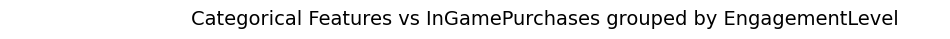

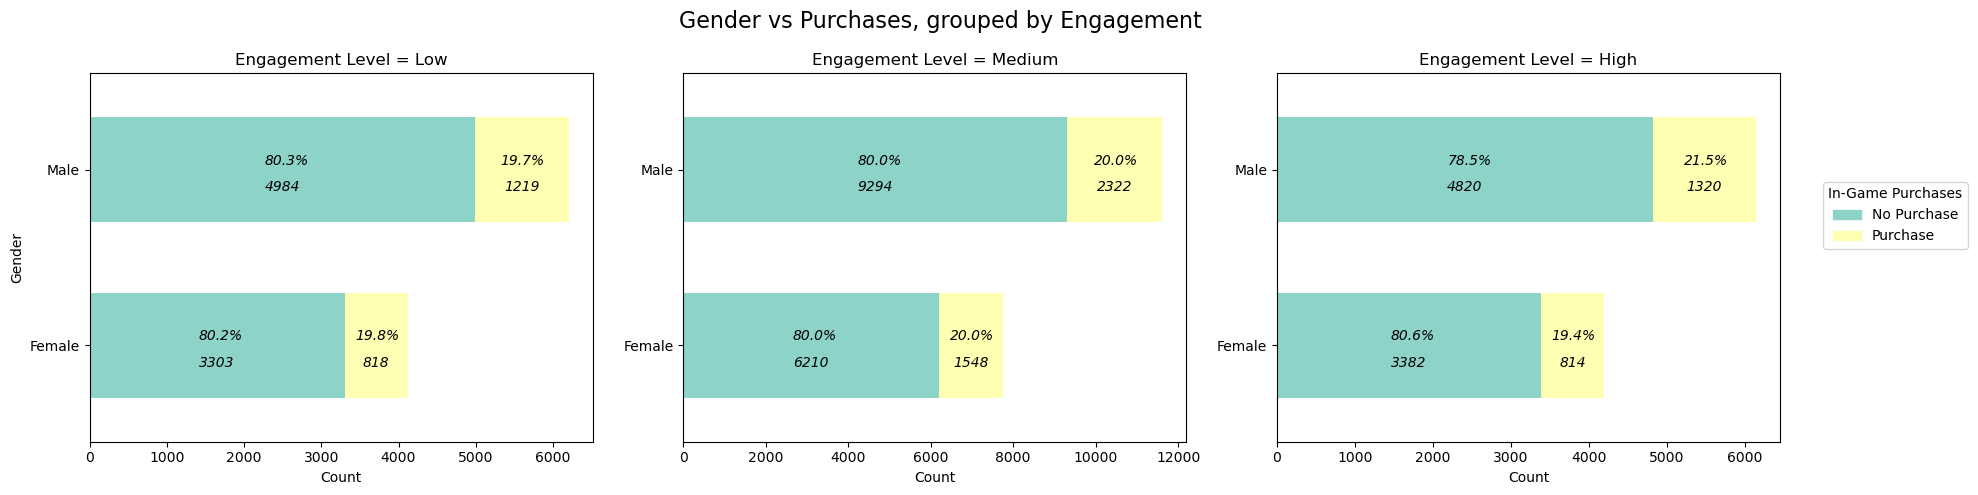

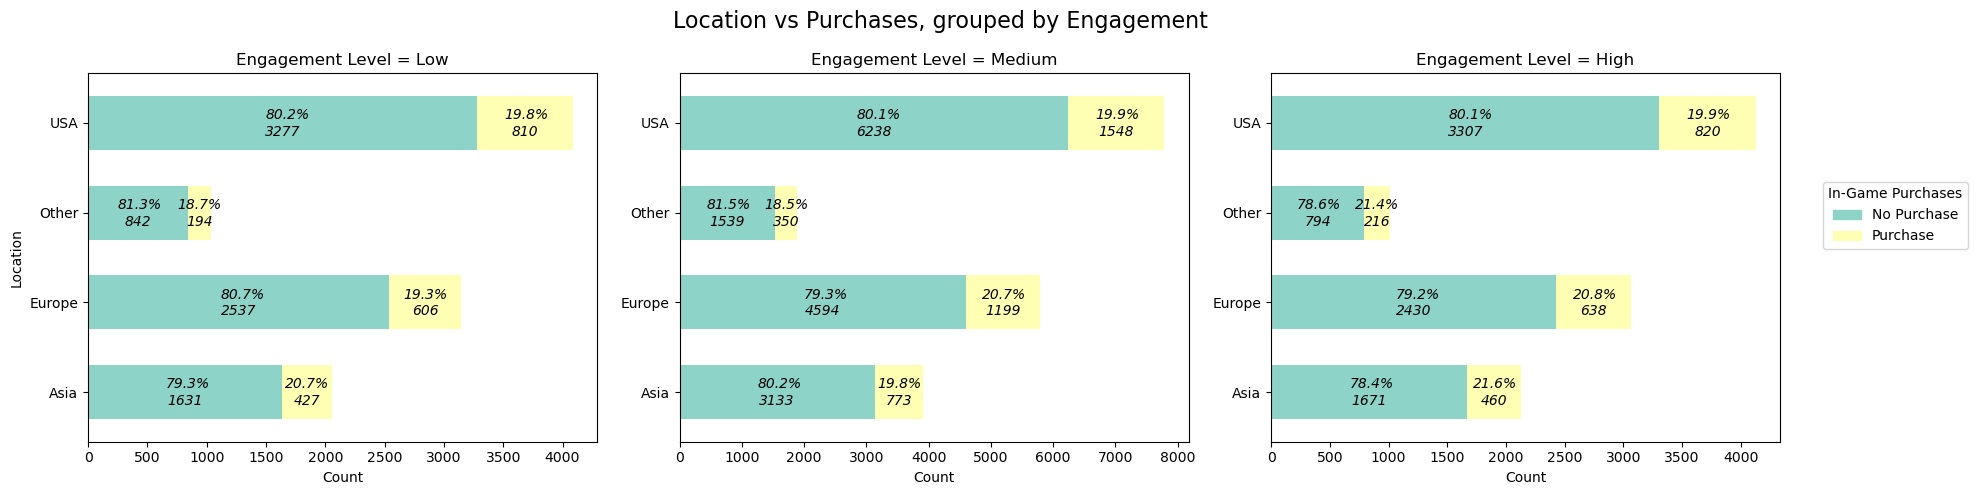

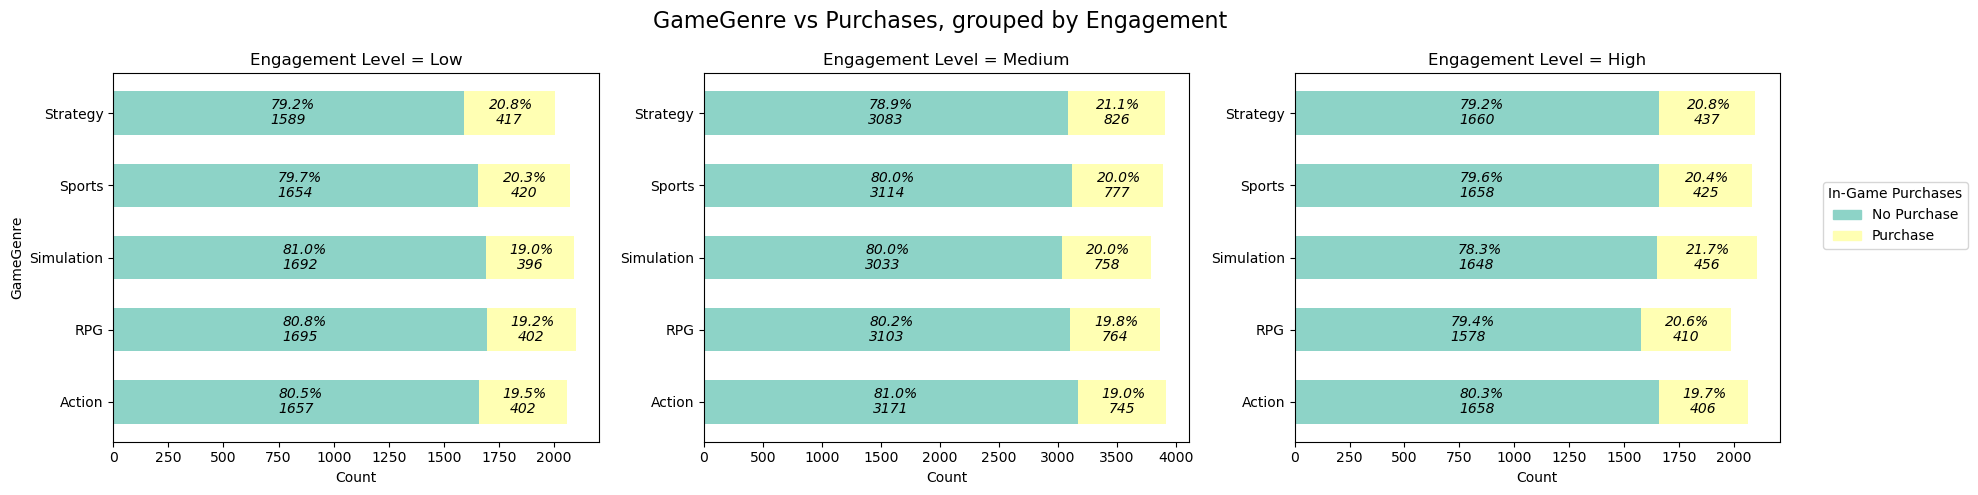

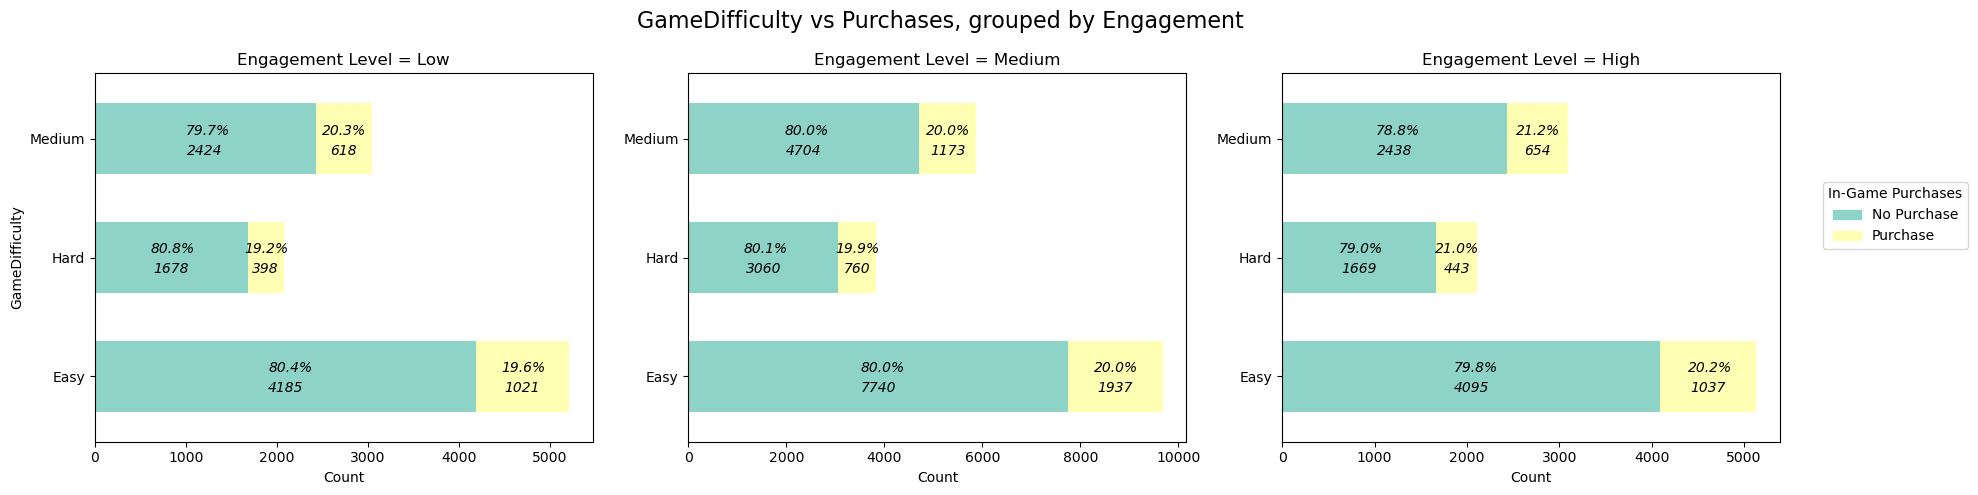

In [13]:
# Relationship between Categorical columns, InGamePurchases, and EngagementLevel

categorical_columns = ["Gender", "Location", "GameGenre", "GameDifficulty"]
engagement_levels = ["Low", "Medium", "High"]

plt.figure(figsize=(12, 0.01))
plt.text(0.575, 0.5, "Categorical Features vs InGamePurchases grouped by EngagementLevel", 
         fontsize=14, ha="center", va="center")
plt.axis("off")
plt.show()

for category in categorical_columns:
    fig, axes = plt.subplots(ncols=len(engagement_levels), figsize=(18, 5))
    fig.suptitle(f"{category} vs Purchases, grouped by Engagement", x=0.525, fontsize=16)

    colors = plt.cm.Set3.colors[:2] 
    legend_labels = ["No Purchase", "Purchase"]

    for j, engagement in enumerate(engagement_levels):
        ax = axes[j]

        purchase_counts = df[df["EngagementLevel"] == engagement].groupby(category)["InGamePurchases"].value_counts().unstack(fill_value=0)

        purchase_proportions = purchase_counts.div(purchase_counts.sum(axis=1), axis=0)

        # Stacked bar chart
        purchase_counts.plot(kind="barh", stacked=True, color=colors, ax=ax, width=0.6)
        ax.set_title(f"Engagement Level = {engagement}")
        ax.set_xlabel("Count")
        ax.set_ylabel(category if j == 0 else "")
        ax.get_legend().remove()

        for bar_index, (category_value, row) in enumerate(purchase_counts.iterrows()):
            start = 0
            for k, value in enumerate(row):
                if value > 0:
                    ax.text(start + value / 2, bar_index-0.1, f"{int(value)}",
                            ha="center", va="center", fontsize=10, fontstyle="italic", color="black")
                start += value

        for bar_index, (category_value, row) in enumerate(purchase_proportions.iterrows()):
            start = 0
            for k, value in enumerate(row):
                if value > 0:
                    ax.text(start + purchase_counts.loc[category_value, k] / 1.95, bar_index + 0.01,
                            f"{value:.1%}", ha="center", va="bottom", fontsize=10, fontstyle="italic", color="black")
                start += purchase_counts.loc[category_value, k]

    legend_handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
    fig.legend(legend_handles, legend_labels, title="In-Game Purchases", 
               loc="upper right", bbox_to_anchor=(1.1, 0.65), fontsize=10)

    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 0.075))
    plt.axis("off")
    plt.show()

## Analysis of Categorical features vs. In-Game Purchases across Engagement Levels

#### Gender
- **EngagementLevel - Low:**
  - **Observation:** Across Males and Females with a low engagement level, the proportion of each making in-game purchases is more or less the same (M - *19.7%* vs. F -*19.8%*).
  - **Conclusion:** When engagement level is *low*, both *male* and *female* players are equally likely to make in-game purchases or not make them.
- **EngagementLevel - Medium:**
  - **Observation:** The same pattern can be observed across the genders with an engagement level of medium, however in this case, the proportional split for in-game purchases is identical for both (*80-20*).
  - **Conclusion:** Similarly, when engagement level is *medium*, both genders are equally likely to make in-game purchases or not make them.
- **EngagementLevel - High:**
  - **Observation:** Males make more in-game purchases than Females (*21.5%* vs *19.4%*) when the engagement level is high.
  - **Conclusion:** This suggests that males are more likely to spend money when they are highly engaged.
- **Recommendation:**
  - The games that highly engaged males play could have male-centric purchasable items that appeals to male traits & desires such as competitiveness, authenticity, status, power, and progression or the incentives offered by these games to make in-game purchases are more effective on males than females.
  - Game companies may increment in-game purchases from female players by selling items that correlate with female desires such as social belonging, aesthetic personalization, and narrative investment.
  - Ads for in-game items structured in a way such that they allude to these traits could incentivize male players to spend more money on the games.

#### Location
- **EngagementLevel - Low:**
  - **Observation:** When the engagement level is low, Asian players make the most purchases (*20.7%*), followed by USA (*19.8%*), Europe (*19.3%*), and lastly Other countries (*18.7%*)
  - **Conclusion:** Players from *Asia* are most likely to make in-game purchases when the engagement level is low. This could be due to the sheer volume of the players that reside in Asia which is around 1.48 billion gamers. With such a large gaming audience, spending money on videogames could be more conventional in Asian countries and therefore these players are more likely to spend money despite their low engagement. The same explanation could be applied to other regions as well as the degree of conventionality of gaming in these regions matches the order of their ranking in terms of the proportions of players making in-game purchases.  
- **EngagementLevel - Medium:**
  - **Observation:** The first position for the proportion of players making in-game purchases whose engagement level is medium goes to Europe this time (*20.7%*). USA (*19.9%*) & Asia (*19.8%*) following along very closely to each other, with Other countries ranking last (*18.5%*).
  - **Conclusion:** The first place of *Europe* could also be explained as a consequence of the same phenomenon mentioned previously as Europe also has a high gaming population of 715 million gamers. While players from *USA* and *Asia* are less likely than European players to make in-game purchases, they are equally likely to make purchases, when the engagement level is medium, and lastly players from other parts of the world are least likely.  
- **EngagementLevel - High:**
  - **Observation:** The players from Asia are most likely to make purchases (*21.6%*) when they are highly engaged, followed by Europe (*20.8%*), USA (*19.9%*) and Other countries (*21.4%*).
  - **Conclusion:** The volume of the gamers argument supports the proportions observed for highly enagaged players as well, as the degree of the volume of the gamers in the regions matches their ranking in terms of the proportions of the players making in-game purchases.     
- **Recommendation:**
  - For players across all regions of the world, who are not very engaged with the games, the best course of action would be to attempt to increase their engagement levels as a low engagement level is not a reliable predictor of long term investment into a game and consequently its in-game items and the purchase of those items.
  - The same goal is preferable for those with *medium* engagement, maybe even more so than for those with *low* engagement as players would rather feel something than not feel anything at all. Those players with low engagement could have spent money for a competitive edge or social acceptance/exaltation due to their low satisfaction with the game, however those with neutral feelings may not feel these desires and as a result, could have less of an incentive to spend money. The reduction in the proportions of players who make in-game purchases for Asia and Other countries may grant credence to this claim.
  - With regards to players with an *high* engagement level who make in-game purchases, *Other* and *USA* are lesser proportionally than *Asia* & *Europe* probably due to their lower gaming population as explained previously. A good strategy would be to identify geographical locations in these regions where gaming is still a niche or less conventional relative to other areas, develop marketing campaigns tailored to these regions and begin widespread advertising to elevate gaming from a niche to something more quotidian, therefore incentivizing people in these regions to pick up videogames as a hobby, consequently increasing the gaming population and increasing the odds of a greater flow of revenue.

#### GameGenre
- **EngagementLevel - Low:**
  - **Observation:** When the engagement level is *low*, players who play *Strategy* games make more in-game purchases (*20.8%*), followed by *Sports* (*20.3%*), *Action* (*19.5%*), *RPG* (*19.2%*), and concluding with *Simulation* (*19.0%*).
  - **Conclusion:** This higher affinity for in-game items in *Strategy* and *Sports* games could be due to the availability of a variety of purchasable items that offer unique gameplay advantages in these games. These games are also notorious for implementing loot-box items in their games that are akin to Gambling, such that certain items obtained from these boxes may offer additional perks to players. Therefore, players who are minimally engaged could have made more in-game purchases in an attempt to increase their engagement.  
- **EngagementLevel - Medium:**
  - **Observation:** With an engagement level of *medium*, players of *Strategy* games made the most in-game purchases (*21.1%*), followed by *Sports* and *Simulation* (*20.0%*), RPG (*19.8%*), and Action (*19.0%*).
  - **Conclusion:** The proportion of players who make in-game purchases went up for three genres, namely *Strategy*, *Simulation*, and *RPG* while it went down for the others. This increase in *Strategy*, *Simulation* and *Action* games suggests that for these specific genres, players who are more engaged are more likely to make in-game purchases.
- **EngagementLevel - High:**
  - **Observation:** When the engagement level is *high*, *Simulation* game players make the most purchases (*21.7%*), followed by *Strategy* (*20.8%*), *RPG* (*20.6%*), *Sports* (*20.4%*) and *Action* (*19.7%*). 
  - **Conclusion:** Almost all the game genres show an increase in proportions of in-game purchases, except for *Strategy*. However, its proportion matches that of the proportion for when the engagement level is *low*, so ultimately the reduction is negligible. Therefore, we can conclude that across all game genres, higher player engagement leads to more in-game purchases from the player base.     
- **Recommendation:**
  - Overall, when all genres across all engagement levels are considered, it is evident that higher the engagement, higher the odds of players making in-game purchases.
  - Thus, gaming companies in general, regardless of the genre of games they produce and publish, should aim to increase their players' engagement

#### GameDifficulty
- **EngagementLevel - Low:**
  - **Observation:** Across Game Difficulty categories when the engagement level is *low*, players who play on *medium* difficulty make the most purchases (*20.3%*), followed by *Easy* (*19.6%*) and then *Hard* (*19.2%*).
  - **Conclusion:** This data suggests that when players are not sufficiently engaged, a *medium* difficulty is conducive to the most in-game purchases and a *hard* difficulty has the lowest chances of making players make in-game purchases
- **EngagementLevel - Medium:**
  - **Observation:** When the engagement level is *medium*, the proportion of players making in-game purchases, oddly enough, are equally distributed across all three difficulty modes (*~20.0%*). 
  - **Conclusion:** This suggests that there is no correlation between difficulty modes and in-game purchases when the player's feelings towards the game are neutral, i.e., *medium* engagement.
- **EngagementLevel - High:**
  - **Observation:** For players with an *high* engagement level, the proportion of players making in-game purchases is highest for those who play on a *medium* difficulty level (*21.2%*), while it is *lowest* for those who play on *easy* mode (*20.2%*), with the *Hard* mode in the middle, very close to *medium* (*21.0%*). 
  - **Conclusion:** It can be observed that a *high* engagement level leads to the most in-game purchases across all three difficulty modes with *hard* and *medium* difficulties showing more notable increase in the proportions. This could mean that when players are highly engaged, harder difficulty modes yield more in-game purchases than easier modes.  
- **Recommendation:**
  - The same pattern as in other features, where a higher engagement level leads to more in-game purchases can be observed here as well.
  - Across all three engagement levels, we see a steady increase in in-game purchases across all three difficulty modes as the engagement level goes up, suggesting that ultimately, game difficulty is of less importance for in-game purchases, than player engagement.
  - Therefore, game companies may aim to design their games such that it is engaging across all difficulty levels if they choose to implement a difficulty system, or they may set only one standard difficulty, prioritizing player experience within that difficulty rather than try to appeal to everyone, which could increase player engagement and lead to more in-game purchases.  

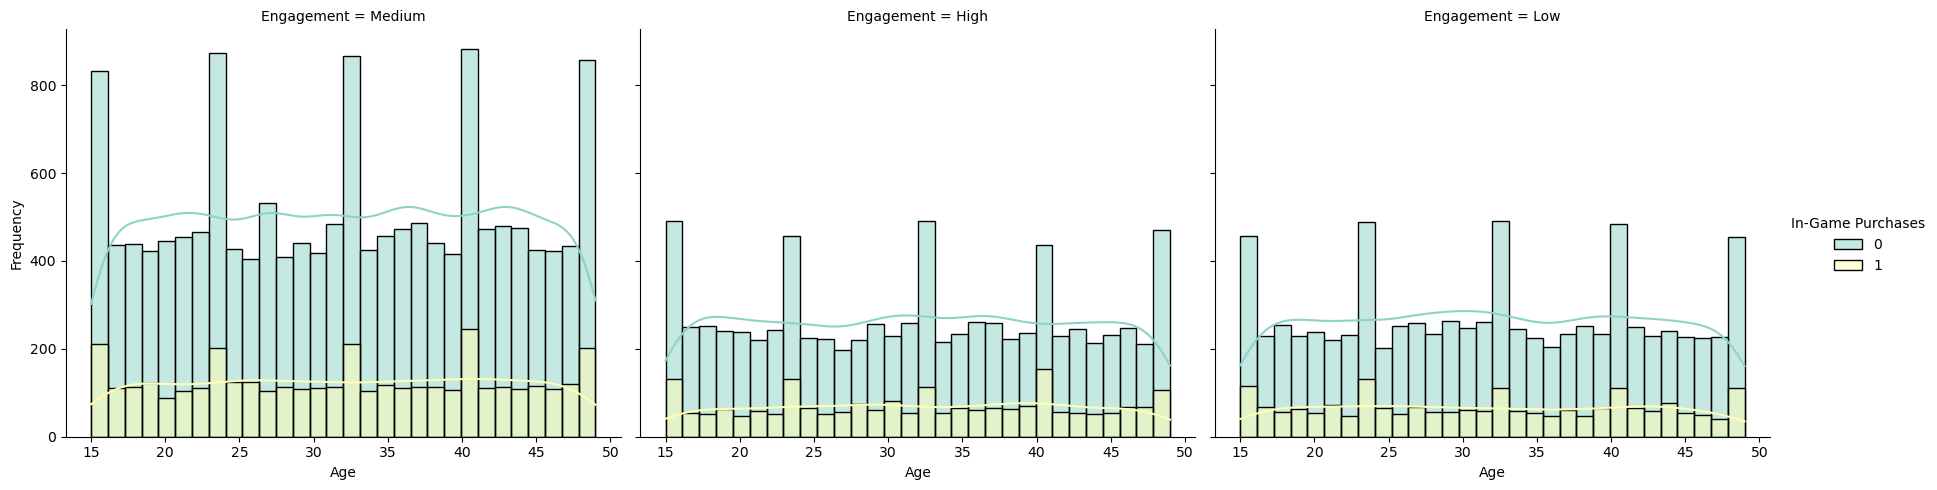

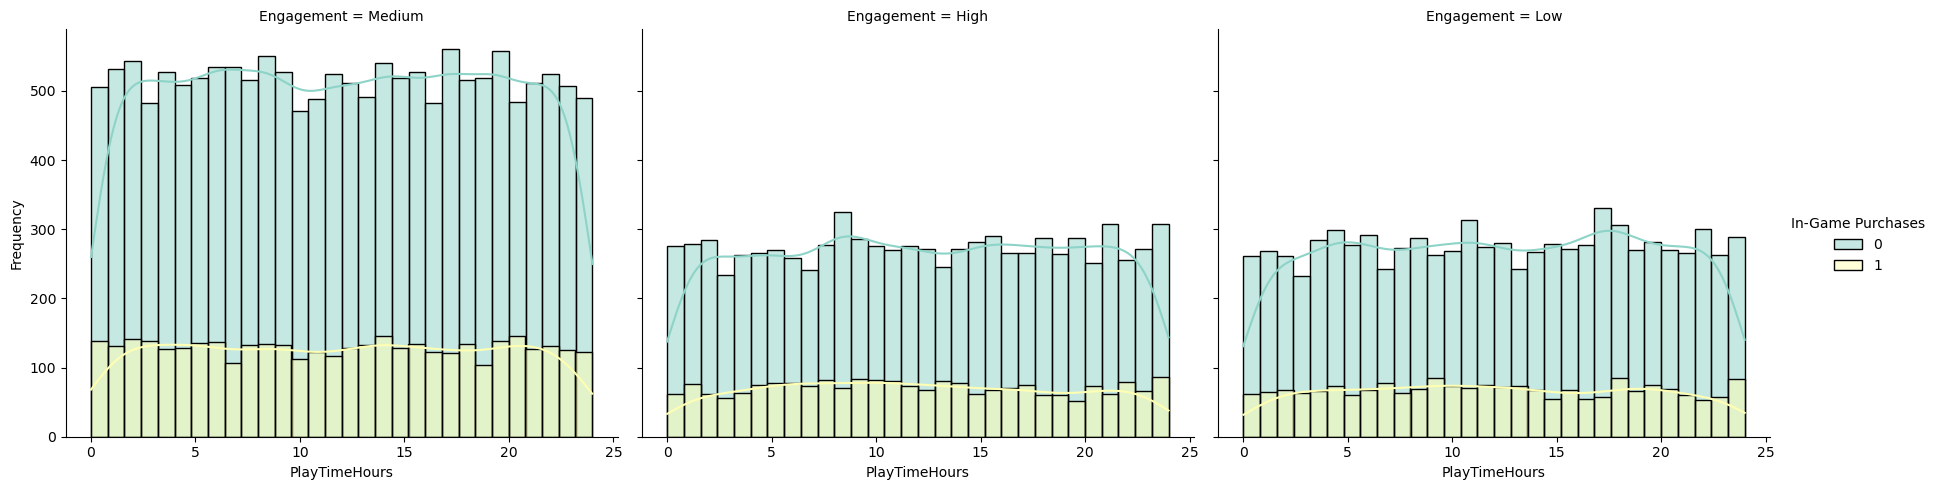

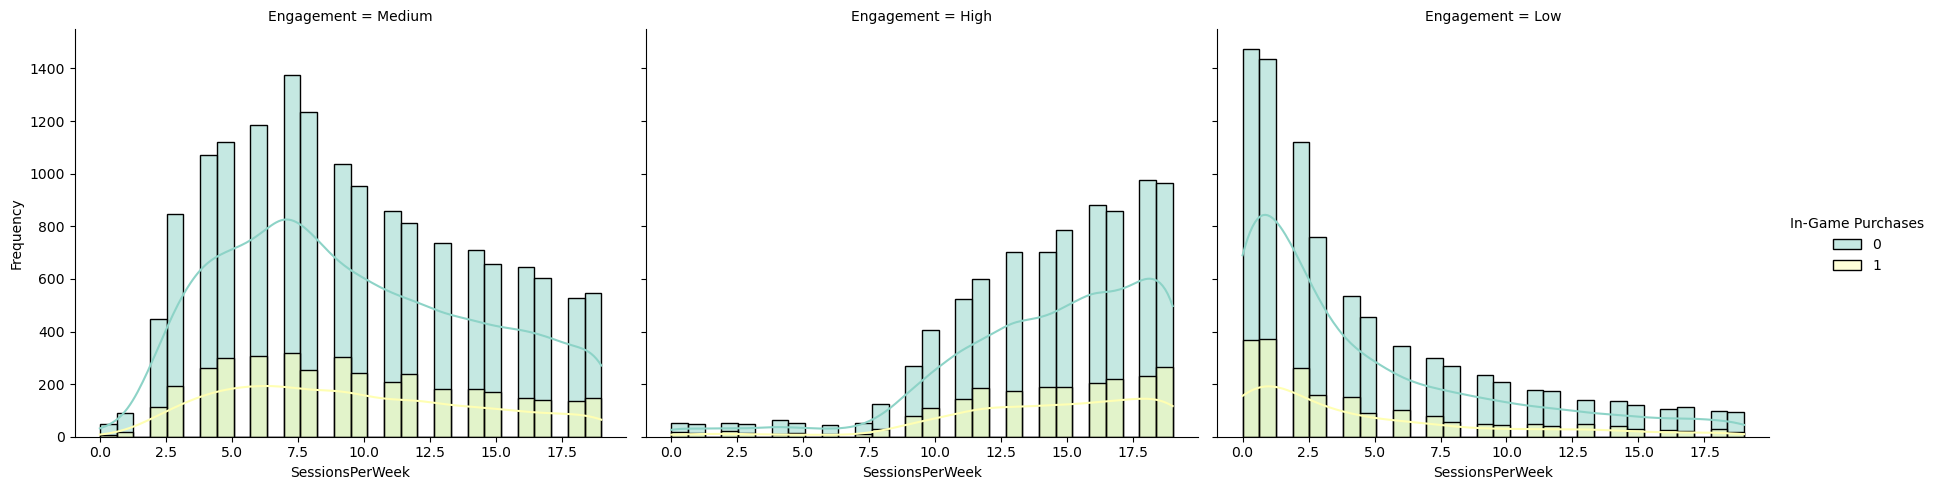

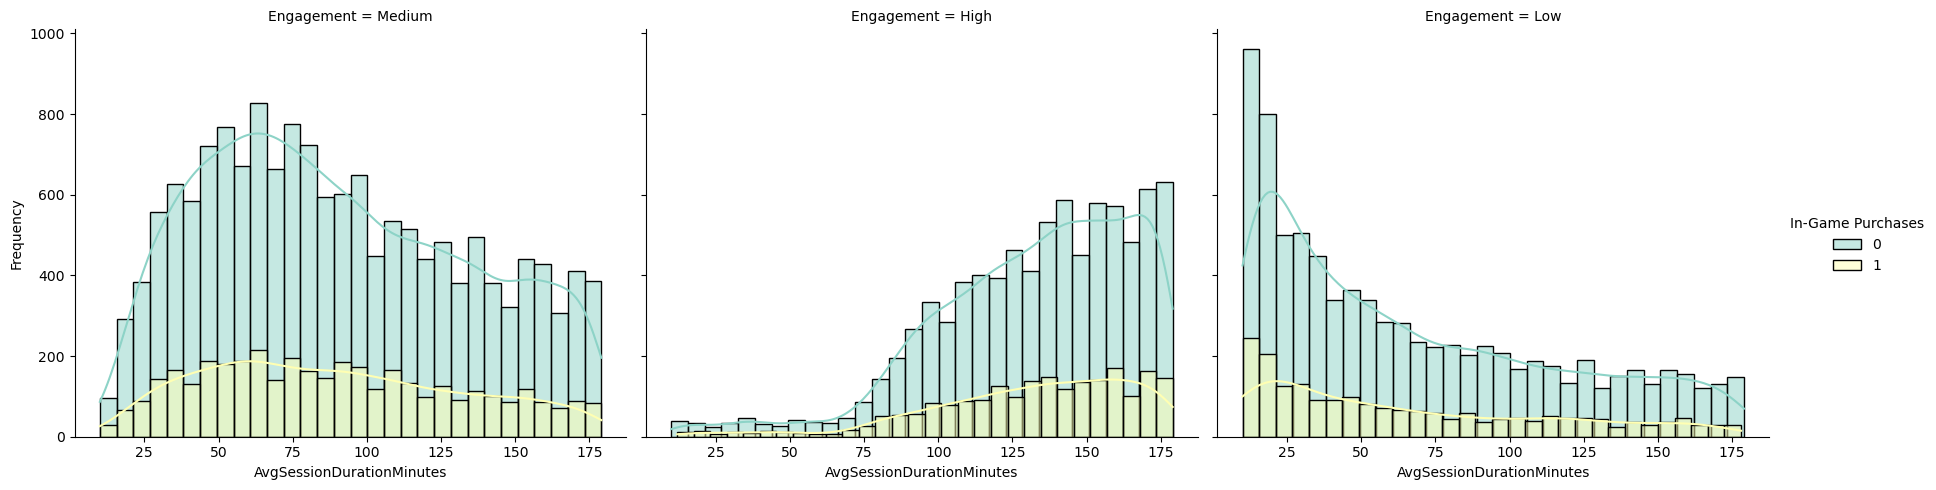

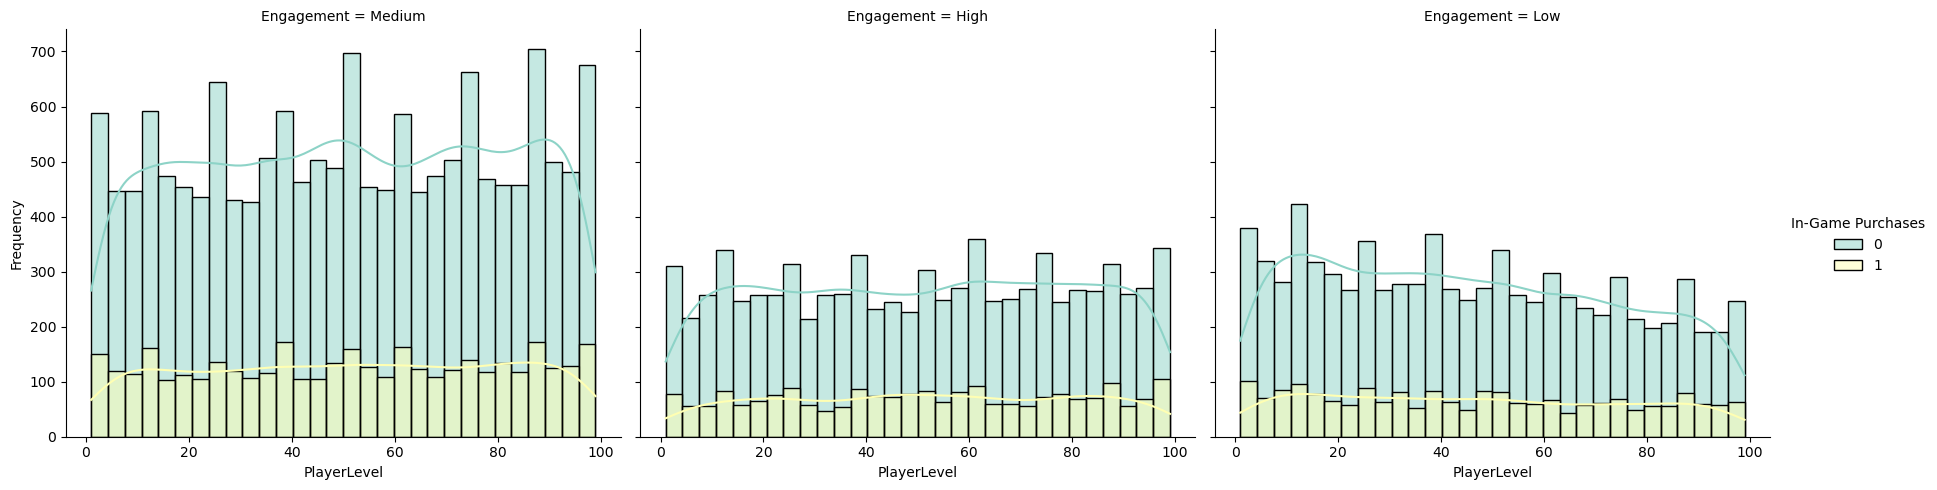

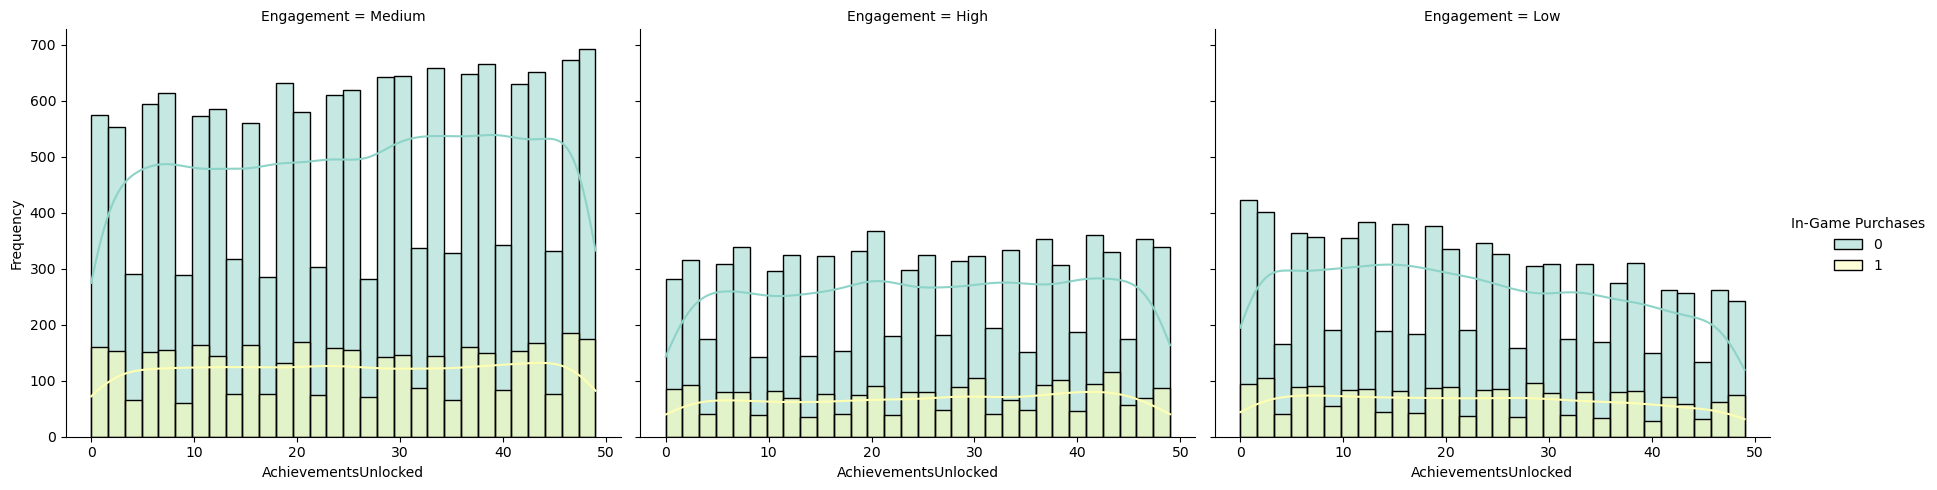

In [14]:
# Relationship between Numerical columns, InGamePurchases, and EngagementLevel

numerical_columns = ['Age', 'PlayTimeHours', 'SessionsPerWeek', 'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked']

for num_col in numerical_columns:
    g = sns.FacetGrid(df, col="EngagementLevel", hue="InGamePurchases", palette="Set3", height=5, aspect=1.2)
    g.map(sns.histplot, num_col, kde=True, bins=30)

    g.set_axis_labels(num_col, "Frequency")
    g.set_titles(col_template="Engagement = {col_name}")
    g.add_legend(title="In-Game Purchases")

    plt.show()